# 데이터 가져오기

In [45]:
import pandas as pd

In [46]:
pd.read_csv('./data/sample_submission.csv').head(3)

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0


In [47]:
train = pd.read_csv('./data/train.csv',parse_dates=['일자'])
test = pd.read_csv('./data/test.csv',parse_dates=['일자'])
print('train.shape : ',train.shape)
print('test.shape  : ',test.shape)

train.shape :  (1205, 12)
test.shape  :  (50, 10)


In [48]:
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [49]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


In [51]:
train.describe().round(2)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00
mean,2807.82,157.91,241.14,274.12,43.51,890.33,461.77
std,171.26,144.19,43.53,246.24,109.94,209.51,139.18
min,2601.00,23.00,41.00,0.00,0.00,296.00,0.00
25%,2645.00,71.00,217.00,4.00,0.00,758.00,406.00
50%,2760.00,105.00,245.00,299.00,0.00,879.00,483.00
75%,2962.00,185.00,272.00,452.00,0.00,1032.00,545.00
max,3305.00,1224.00,378.00,1044.00,533.00,1459.00,905.00


# 1. 데이터 전처리

## 1.1 칼럼명 변경

In [53]:
print(train.columns)
print(test.columns)

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')
Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴'],
      dtype='object')


In [54]:
train.columns = ['ymd', 'dow', 'employees', 'dayoff', 'bustrip', 'overtime',
                 'remote', 'menu1', 'menu2', 'menu3', 'ln', 'dn']
test.columns = ['ymd', 'dow', 'employees', 'dayoff', 'bustrip', 'overtime',
                'remote', 'menu1', 'menu2', 'menu3']

In [55]:
train = train.drop('menu1', axis=1)
test = test.drop('menu1', axis=1)

In [56]:
train_raw = train.copy()
test_raw = test.copy()

## 1.2 날짜 데이터

In [57]:
# 요일을 숫자 형태로 변환
# 0: 월, 1: 화, ...
train.dow = train.ymd.dt.weekday
test.dow = test.ymd.dt.weekday

## 1.3 메뉴

In [58]:
from tqdm.notebook import tqdm
import numpy as np

In [59]:
train.menu2 = train.menu2.str.replace('(New)','',regex=False)
train.menu2 = train.menu2.str.replace('( New)','',regex=False)
train.menu3 = train.menu3.str.replace('(New)','',regex=False)
test.menu2 = test.menu2.str.replace('(New)','',regex=False)
test.menu3 = test.menu3.str.replace('(New)','',regex=False)

In [60]:
def menulist(df_menu):
    tmp = df_menu.str.split()
    tmp_menu = []
    for menu in tmp:
        for m in menu:
            if '(' in m:
                menu.remove(m)
        tmp_menu.append(menu)
    return tmp_menu

In [68]:
train.menu2[1142] = train.menu2[1142].replace('쌀밥/ ','쌀밥/')

<ipython-input-68-b8e57dc6fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.menu2[1142] = train.menu2[1142].replace('쌀밥/ ','쌀밥/')


In [70]:
# train 점심메뉴
train.menu2 = train.menu2.str.replace('\*\S+|\&\S+','',regex=True)
train_menu2 = menulist(train.menu2)
train_menu2[1065:1070]

[['쌀밥/잡곡밥', '매운소고기국', '굴비구이', '토마토프리타타', '도라지오이무침', '배추겉절이'],
 ['돈육버섯고추장덮밥', '팽이무국', '양파링카레튀김', '모듬어묵볶음', '참나물생채', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병', '고구마순볶음', '포기김치', '양상추샐러드'],
 ['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반', '배추겉절이', '양상추샐러드'],
 ['카레라이스', '동태알탕', '부추고추전', '쫄면야채무침', '과일요거트샐러드', '포기김치', '요구르트']]

In [71]:
rice = [];soup=[];side1=[];side2=[];side3=[];kimchi=[];etc=[]
for i,menu in enumerate(train_menu2):
    rice.append(menu[0])
    soup.append(menu[1])
    side1.append(menu[2]);side2.append(menu[3]);side3.append(menu[4])
    
    if i < 1067:
        kimchi.append(menu[-1])
        etc.append(menu[-2])
    else:
        kimchi.append(menu[-2])
        etc.append(menu[-1])

In [72]:
train_ln = train[['ymd','dow','employees','dayoff','bustrip','overtime','remote','menu2', 'ln']].copy()
train_ln['rice'] = rice
train_ln['soup'] = soup
train_ln['side1'] = side1;train_ln['side2'] = side2;train_ln['side3'] = side3
train_ln['kimchi'] = kimchi
train_ln['etc'] = etc

In [73]:
train_ln.head(3)

,ymd,dow,employees,dayoff,bustrip,overtime,remote,menu2,ln,rice,soup,side1,side2,side3,kimchi,etc
0,2016-02-01,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,포기김치,요구르트
1,2016-02-02,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,배추겉절이,요구르트
2,2016-02-03,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,포기김치,요구르트


In [74]:
train.menu3 = train.menu3.str.replace('\*\S+|\&\S+','',regex=True)
train_menu3 = menulist(train.menu3)
train_menu3[0]

['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치']

In [75]:
# train 저녁메뉴
rice = [];soup=[];side1=[];side2=[];side3=[];kimchi=[]
for i,menu in tqdm(enumerate(train_menu3)):
    if len(menu) > 3:
        rice.append(menu[0])
        soup.append(menu[1])
        side1.append(menu[2]);side2.append(menu[3]);side3.append(menu[4])
        kimchi.append(menu[-1])
    else:
        rice.append(np.nan)
        soup.append(np.nan)
        side1.append(np.nan);side2.append(np.nan);side3.append(np.nan)
        kimchi.append(np.nan)
    
train_dn = train[['ymd','dow','employees','dayoff','bustrip','overtime','remote','menu3', 'dn']].copy()
train_dn['rice'] = rice
train_dn['soup'] = soup
train_dn['side1'] = side1;train_dn['side2'] = side2;train_dn['side3'] = side3
train_dn['kimchi'] = kimchi

0it [00:00, ?it/s]

In [76]:
menulist(test.menu2)[0]

['쌀밥/흑미밥/찰현미밥', '대구지리', '매운돈갈비찜', '오꼬노미계란말이', '상추무침', '포기김치', '양상추샐러드*딸기D']

In [77]:
# test 점심메뉴
test.menu2 = test.menu2.str.replace('\*\S+|\&\S+','',regex=True)
test_menu2 = menulist(test.menu2)

rice = [];soup=[];side1=[];side2=[];side3=[];kimchi=[];etc=[]
for i,menu in tqdm(enumerate(test_menu2)):
    if len(menu) > 3:
        rice.append(menu[0])
        soup.append(menu[1])
        side1.append(menu[2]);side2.append(menu[3]);side3.append(menu[4])
        kimchi.append(menu[-2])
        etc.append(menu[-1])
    else:
        rice.append(np.nan)
        soup.append(np.nan)
        side1.append(np.nan);side2.append(np.nan);side3.append(np.nan)
        kimchi.append(np.nan)
        etc.append(np.nan)
    
test_ln = test[['ymd','dow','employees','dayoff','bustrip','overtime','remote','menu2']].copy()
test_ln['rice'] = rice
test_ln['soup'] = soup
test_ln['side1'] = side1;test_ln['side2'] = side2;test_ln['side3'] = side3
test_ln['kimchi'] = kimchi
test_ln['etc'] = etc

0it [00:00, ?it/s]

In [78]:
menulist(test.menu3)[0]

['흑미밥', '얼큰순두부찌개', '쇠고기우엉볶음', '버섯햄볶음', '아삭이고추무절임', '포기김치']

In [79]:
# test 저녁메뉴
test.menu3 = test.menu3.str.replace('\*\S+|\&\S+','',regex=True)
test_menu3 = menulist(test.menu3)

rice = [];soup=[];side1=[];side2=[];side3=[];kimchi=[]
for i,menu in tqdm(enumerate(test_menu3)):
    if len(menu) > 3:
        rice.append(menu[0])
        soup.append(menu[1])
        side1.append(menu[2]);side2.append(menu[3]);side3.append(menu[4])
        kimchi.append(menu[-2])
    else:
        rice.append(np.nan)
        soup.append(np.nan)
        side1.append(np.nan);side2.append(np.nan);side3.append(np.nan)
        kimchi.append(np.nan)
    
test_dn = test[['ymd','dow','employees','dayoff','bustrip','overtime','remote','menu3']].copy()
test_dn['rice'] = rice
test_dn['soup'] = soup
test_dn['side1'] = side1;test_dn['side2'] = side2;test_dn['side3'] = side3
test_dn['kimchi'] = kimchi

0it [00:00, ?it/s]

# 2. 시각화

In [83]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

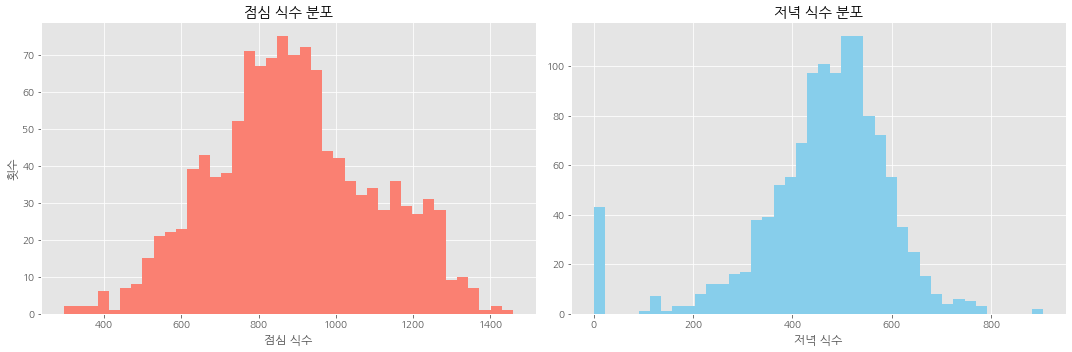

In [109]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(train.ln,bins=40,color='salmon')
plt.xlabel('점심 식수')
plt.ylabel('횟수')
plt.title('점심 식수 분포')

plt.subplot(122)
plt.hist(train.dn,bins=40,color='skyblue')
plt.xlabel('저녁 식수')
plt.title('저녁 식수 분포')

plt.tight_layout()
plt.show()

In [110]:
train.loc[train.dn == 0]

,ymd,dow,employees,dayoff,bustrip,overtime,remote,menu2,menu3,ln,dn
204,2016-11-30,2,2689,68,207,0,0.0,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거 감자샐러드 오복지무침 포기김치 ...,*,1109.0,0.0
224,2016-12-28,2,2705,166,225,0,0.0,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,2,2697,79,203,0,0.0,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,2,2632,75,252,0,0.0,나물비빔밥 (쌀:국내산) 유부장국 생선까스 파스타샐러드 마늘쫑볶음 알타리김치...,*,1065.0,0.0
281,2017-03-22,2,2627,53,235,0,0.0,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,2,2626,45,304,0,0.0,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,2,2637,43,265,0,0.0,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,2,2648,58,259,0,0.0,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,,745.0,0.0
366,2017-07-26,2,2839,254,246,0,0.0,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,4,2642,177,303,45,0.0,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이 쌈무/양파절임 열무...,*,663.0,0.0
